# <center> Apply Momentum strategy on High value Stocks <center>

In [1]:
!pip install alpha_vantage

In [2]:
import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt

In [3]:
api_key = 'XXXXXXXXXXXXXXX' #API Key
CPT = np.array(['AAPL', 'NFLX', 'MSFT', 'AMZN', 'TSLA', 'FB', 'GOOGL'])
ts = TimeSeries(key = api_key, output_format = 'pandas', indexing_type = 'date')

Ongoing Query, Estimated time : 1 minutes
AAPL
NFLX
MSFT
AMZN
TSLA
FB
GOOGL


([], <a list of 0 Text major ticklabel objects>)

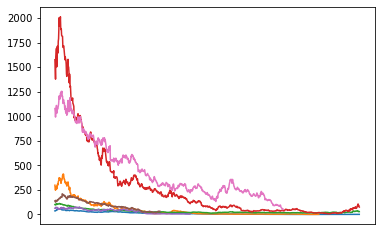

In [4]:
price_data = pd.DataFrame()
print('Ongoing Query, Estimated time : ' + str(round(len(CPT)/5)) + ' minutes')
for x in range(len(CPT)):
    print(str(CPT[x]))

    if (x + 1) % 5 == 0:
        time.sleep(60)

    data, meta_data = ts.get_weekly_adjusted(symbol = str(CPT[x])) 
    data = data['5. adjusted close'].iloc[::-1]             
    data = pd.DataFrame(data).rename(index = str, columns = {'5. adjusted close' : str(CPT[x])})
    price_data = pd.concat([price_data,data], axis = 1, sort = False)
    
price_data = price_data.iloc[:1000].iloc[::-1]

plt.plot(price_data)
plt.xticks([])

In [5]:
returns_df = price_data.copy()
returns_df = returns_df.apply(func = lambda x: x.shift(-1)/x - 1, axis = 0)

([], <a list of 0 Text major ticklabel objects>)

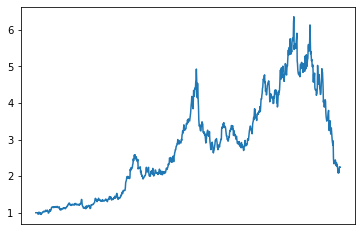

In [6]:
momentum_sig = price_data.copy()
momentum_sig = momentum_sig.apply(func = lambda x: x.shift(1)/x.shift(7) - 1, axis = 0)
momentum_sig = momentum_sig.rank(axis = 1)
for col in momentum_sig.columns: 
    momentum_sig[col] = np.where(momentum_sig[col] >= 8, 1, np.where(momentum_sig[col] <= 2, -1, 0))
returns_sig = np.multiply(returns_df, momentum_sig)
port_returns = pd.DataFrame(index = momentum_sig.index, columns = ['ls'])
port_returns = returns_sig.sum(axis = 1) / 4
port_returns_cum = np.exp(np.log1p(port_returns).cumsum())
plt.plot(port_returns_cum)
plt.xticks([])